In [1]:
import numpy as np
import pandas as pd
from getdist import plots
from getdist.gaussian_mixtures import GaussianND

# 1. Data manipulation from cosmosis output and post-process to better visualization


In [46]:
txt_string = "./numcosmo_fisher.txt"
f = open(txt_string, "r")

for line in f:
    temp = line.split()
    # print(temp)

# print(temp)


fisher_lsst_3x2pt = np.loadtxt(txt_string, dtype="S0")
corr = []
means = []
stddevs = []
names = []
for line in fisher_lsst_3x2pt:
    name = str(line[0]).split("[")[0]
    names.append(name[2:])
    temp_arr = []
    for elem in line[1:]:
        try:
            temp_arr.append(float(elem))
        except:
            pass
        # print(elem)

    mean = temp_arr[0]
    stddev = temp_arr[1]
    temp_arr = temp_arr[2:]
    means.append(mean)
    stddevs.append(stddev)
    corr.append(temp_arr)
    # print(name, temp_arr)
# print(fisher_lsst_3x2pt[0])
# print(corr)

for i in range(len(corr)):
    # corr[i][i]*=stddevs[i]*stddevs[i]
    for j in range(len(corr[i])):
        corr[i][j] *= (stddevs[i] * stddevs[j]) / 2

cov = corr
invcov = np.linalg.inv(cov)
print(invcov)

[[ 1.74288519e+04  1.07497940e+06 -4.16861076e+06  1.89520807e+08
  -3.51550656e+04  4.80369152e+05  4.58789691e+05]
 [ 1.07497940e+06  4.62172602e+12 -3.68530200e+08  2.83002042e+10
   5.54986424e+06  2.64841686e+07  4.78919945e+07]
 [-4.16861076e+06 -3.68530200e+08  2.92598235e+12 -3.84430287e+10
   1.31034666e+07 -1.18693135e+08 -8.00791468e+07]
 [ 1.89520807e+08  2.83002042e+10 -3.84430287e+10  2.41815444e+13
  -1.88080233e+08  5.19718989e+09  4.67625414e+09]
 [-3.51550656e+04  5.54986424e+06  1.31034666e+07 -1.88080233e+08
   2.61609481e+05 -9.80400046e+05 -9.50835867e+05]
 [ 4.80369152e+05  2.64841686e+07 -1.18693135e+08  5.19718989e+09
  -9.80400046e+05  1.33647893e+07  1.26418915e+07]
 [ 4.58789691e+05  4.78919945e+07 -8.00791468e+07  4.67625414e+09
  -9.50835867e+05  1.26418915e+07  1.28449198e+07]]


# 2. Ploting the fisher contours using getdist


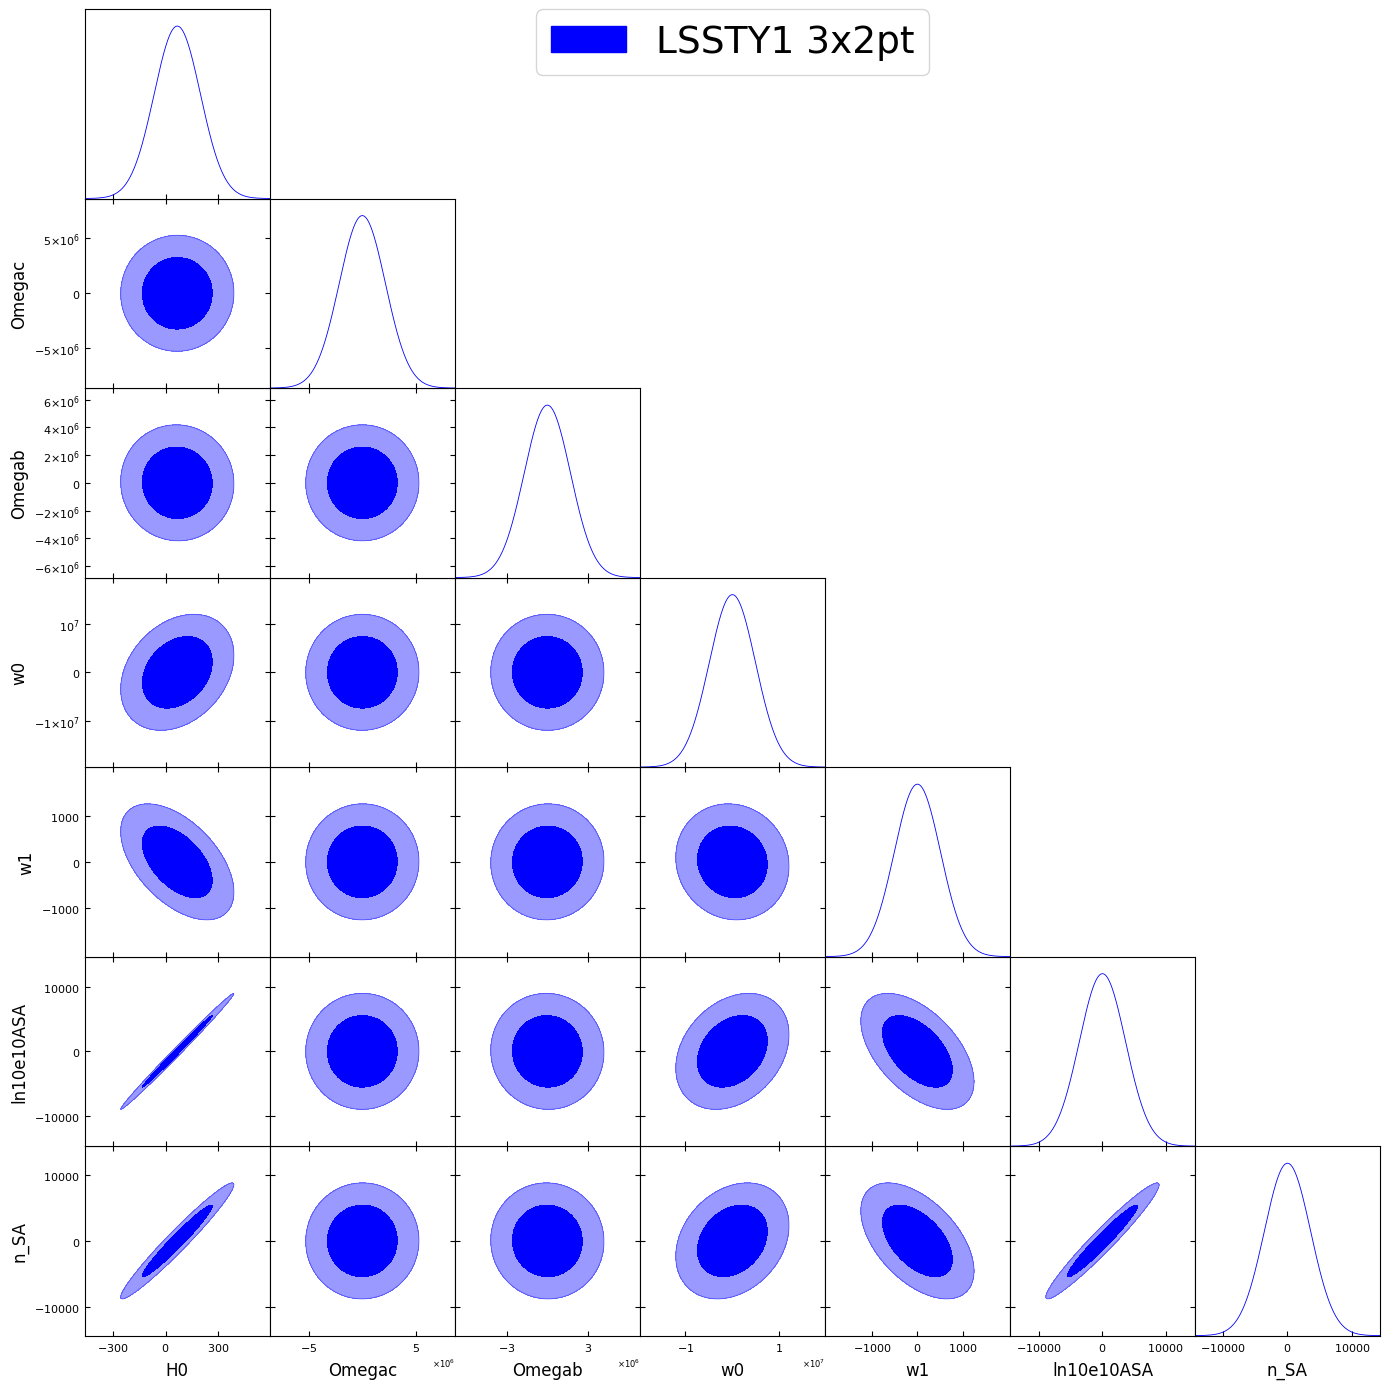

In [47]:
# Constructing a GaussianND object using fiducial values and the inverse Fisher matrix
lsst_3x2pt_fisher_contour = GaussianND(means, invcov, names=names)

# Initialize a subplot plotter for generating the plot
g = plots.get_subplot_plotter()

# Customize the plot settings
g.settings.figure_legend_frame = True
g.settings.axes_labelsize = 15
g.settings.legend_fontsize = 30

# Generate the triangle plot
g.triangle_plot(
    [lsst_3x2pt_fisher_contour],
    filled=True,
    legend_labels=["LSSTY1 3x2pt"],
    contour_colors=["blue"],
)

# Optional: Add parameter markers to the plot
# g.add_param_markers(lsst_3x2pt_vary_param_fid_values, color='black', ls='--')

In [9]:
print(lsst_3x2pt_fisher_df)
print(lsst_3x2pt_fisher_df_inv)

              omega_c       omega_b           a_s           n_s             w  \
omega_c  1.733628e+08 -2.502093e+08  1.506220e+16  3.537535e+07 -2.538385e+06   
omega_b -2.502093e+08  3.749593e+08 -2.225761e+16 -5.211265e+07  2.972385e+06   
a_s      1.506220e+16 -2.225761e+16  1.329994e+24  3.102594e+15 -1.978013e+14   
n_s      3.537535e+07 -5.211265e+07  3.102594e+15  7.405181e+06 -4.623524e+05   
w       -2.538385e+06  2.972385e+06 -1.978013e+14 -4.623524e+05  1.205406e+05   
wa      -2.338498e+06  3.365267e+06 -2.040814e+14 -4.739147e+05  5.055278e+04   
h0       1.165203e+08 -1.719980e+08  1.026948e+16  2.406650e+07 -1.518862e+06   

                   wa            h0  
omega_c -2.338498e+06  1.165203e+08  
omega_b  3.365267e+06 -1.719980e+08  
a_s     -2.040814e+14  1.026948e+16  
n_s     -4.739147e+05  2.406650e+07  
w        5.055278e+04 -1.518862e+06  
wa       3.681048e+04 -1.570633e+06  
h0      -1.570633e+06  7.938102e+07  
[[ 3.58258277e-05 -2.64063893e-05  4.35457424e-

In [8]:
# Defining input file paths
txt_string = "./forecast_3x2pt_PT_samples.txt"
means_string = "../means.txt"


"""---- Data manipulation from cosmosis output to create more organized pandas DataFrames ----"""
# Loading the Fisher matrix from the text file
fisher_lsst_3x2pt = np.loadtxt(txt_string)

# Reading the first line of the file to extract parameter names
with open(txt_string, "r") as file:
    first_line = file.readline().strip()

# Extracting parameter names, assuming they are space-separated and may contain "--"
param_names = first_line.split()
param_names = [param.split("--")[-1] for param in param_names]

# Creating a DataFrame for the Fisher matrix with parameters as rows and columns
lsst_3x2pt_fisher_df = pd.DataFrame(
    fisher_lsst_3x2pt, columns=param_names, index=param_names
)

# Creating a DataFrame to store 'mean' and 'sigma' values
lsst_3x2pt_means_df = pd.DataFrame(index=["mean", "sigma"])

# Reading the 'means' file and extracting mean and error data
with open(means_string, "r") as file:
    next(file)  # Skipping the first line, if necessary
    for line in file:
        lines = line.split()  # Assuming values are space-separated
        param_line = [param.split("--")[-1] for param in lines]  # Handling the "--"
        key = param_line[0]  # Parameter name
        mean = float(param_line[1])  # Mean value
        sigma = float(param_line[2])  # Error
        lsst_3x2pt_means_df[key] = [mean, sigma]  # Adding to DataFrame
"""----------------------------------------------------------------------------------------------"""


# Transposing the DataFrame for easier access to values by parameter
lsst_3x2pt_means_df = lsst_3x2pt_means_df.T

# ---- Converting pandas DataFrames to numpy arrays ---- #

# List of varying parameters
lsst_3x2pt_vary_param = lsst_3x2pt_means_df.index

# Fiducial values (mean)
lsst_3x2pt_vary_param_fid_values = lsst_3x2pt_means_df["mean"]

# Errors (sigma)
lsst_3x2pt_vary_param_fid_errors = lsst_3x2pt_means_df["sigma"]

# Inverting the Fisher matrix
lsst_3x2pt_fisher_df_inv = np.linalg.inv(lsst_3x2pt_fisher_df)